In [1]:
# Collect sample data

import requests

url = "https://eodhistoricaldata.com/api/eod/MCD.US?api_token=demo"

data = requests.get(url)

In [2]:
# Save the data in a CSV file

with open("sample_data.csv", "w") as f:
    f.write(data.text)

In [3]:
import pandas as pd

df = pd.read_csv("sample_data.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adjusted_close,Volume
0,1966-07-05,10.9176,11.0872,10.8360,10.9176,0.1334,388800
1,1966-07-06,11.5024,11.5024,10.8360,11.5024,0.1406,692550
2,1966-07-07,11.0872,11.7936,11.0008,11.0872,0.1355,1858950
3,1966-07-08,11.2096,11.2096,10.8360,11.2096,0.1370,1239300
4,1966-07-11,11.1672,11.5024,11.0416,11.1672,0.1365,656100
...,...,...,...,...,...,...,...
14220,2022-12-30,265.2000,265.3800,261.4000,263.5300,263.5300,1720100
14221,2023-01-03,263.5300,264.3500,259.5100,264.3300,264.3300,2743800
14222,2023-01-04,266.2500,266.5500,262.8900,264.3900,264.3900,2584100
14223,2023-01-05,264.7600,264.7600,261.3800,262.1600,262.1600,1945600


In [5]:
df_close = df[["Close"]]
df_close

,Close
0,10.9176
1,11.5024
2,11.0872
3,11.2096
4,11.1672
...,...
14220,263.5300
14221,264.3300
14222,264.3900
14223,262.1600


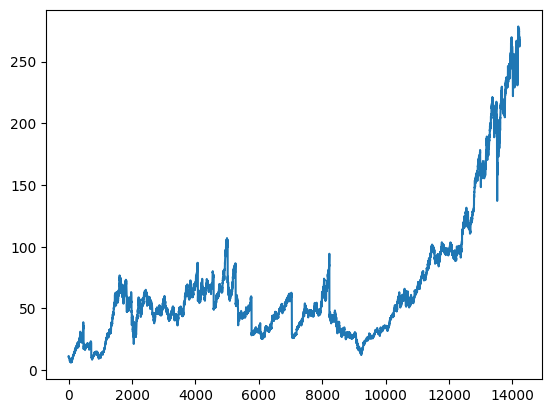

In [6]:
# Plot the data
from matplotlib import pyplot as plt

plt.plot(df_close)
plt.show()

In [7]:
# Split the data into train and test sets
df_train = df_close[:int(0.8*len(df_close))]
df_test = df_close[int(0.8*len(df_close)):]

In [8]:
# Train the model using SVR
from sklearn.svm import SVR

svr = SVR(kernel="rbf", C=1)
svr.fit(df_train.index.values.reshape(-1, 1), df_train.values.ravel())

SVR(C=1)

In [9]:
# Save the model using joblib
import joblib

# use level 5 compression
joblib.dump(svr, "sample_model.joblib", compress=5)

['sample_model.joblib']

In [10]:
# Use the model to predict the test set
df_test["Predicted"] = svr.predict(df_test.index.values.reshape(-1, 1))
df_test

C:\Users\johnm\AppData\Local\Temp\ipykernel_28116\2842615579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Predicted"] = svr.predict(df_test.index.values.reshape(-1, 1))


,Close,Predicted
11380,88.81,80.698073
11381,89.31,80.735502
11382,87.52,80.772927
11383,85.99,80.810348
11384,87.37,80.847764
...,...,...
14220,263.53,108.765859
14221,264.33,108.747074
14222,264.39,108.728281
14223,262.16,108.709477


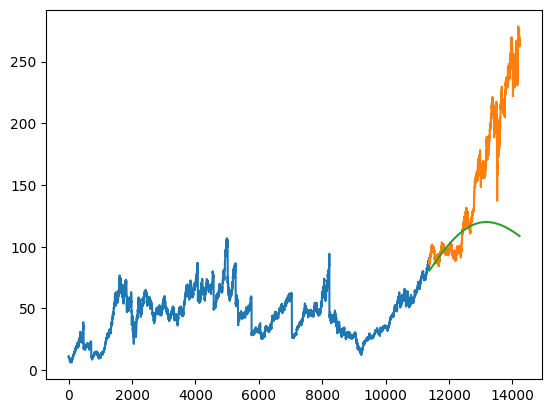

In [11]:
# Plot the data
plt.plot(df_train)
plt.plot(df_test)
plt.show()

In [12]:
# load the model
svr = joblib.load("sample_model.joblib")